In [42]:
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import koreanize_matplotlib

In [43]:
data=pd.read_csv(r'C:\KDT\프로젝트\0822 위스키\spirits_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       12869 non-null  int64  
 1   Name             12869 non-null  object 
 2   Country          12836 non-null  object 
 3   Brand            12869 non-null  object 
 4   Categories       12856 non-null  object 
 5   Tasting Notes    1889 non-null   object 
 6   ABV              10556 non-null  object 
 7   Base Ingredient  1262 non-null   object 
 8   Years Aged       1470 non-null   float64
 9   Rating           12869 non-null  float64
 10  Rate Count       12869 non-null  int64  
 11  Price            12569 non-null  object 
 12  Volume           56 non-null     object 
 13  Description      9969 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.4+ MB


In [44]:
whiskey=pd.DataFrame(columns=data.columns)
whiskey

,Unnamed: 0,Name,Country,Brand,Categories,Tasting Notes,ABV,Base Ingredient,Years Aged,Rating,Rate Count,Price,Volume,Description


In [45]:
n=0
for row in data.index:
    try:
        if 'Whiskey' in data.loc[row,'Categories']:
            whiskey.loc[n]=data.loc[row]
            n+=1
    except:
        print('error')

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8480\1905985542.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  whiskey.loc[n]=data.loc[row]


error
error
error
error
error
error
error
error
error
error
error
error
error


In [46]:
whiskey['Country'].value_counts()

Country
United States         2209
Scotland              1168
Canada                 215
Ireland                193
United Kingdom         167
Japan                   86
Taiwan                  14
India                   14
France                   8
Portugal                 3
Australia                3
New Zealand              2
Germany                  2
Austria                  2
Belgium                  1
Israel                   1
Netherlands              1
Africa                   1
Mexico                   1
Poland                   1
Switzerland              1
Dominican Republic       1
Italy                    1
Norway                   1
Name: count, dtype: int64

In [47]:
# 버번위스키만 추출
bourbon=whiskey[whiskey['Country']=='United States']
bourbon

,Unnamed: 0,Name,Country,Brand,Categories,Tasting Notes,ABV,Base Ingredient,Years Aged,Rating,Rate Count,Price,Volume,Description
0,181,Jack Daniel’s Old No. 7 Tennessee Whiskey,United States,Jack Daniels,"Bourbon, Whiskey",NaN,40%,NaN,NaN,4.8,991,$24.00,750ml,Jack Daniel's Tennessee Whiskey is the world's...
1,182,Jack Daniel’s Tennessee Honey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",NaN,35%,NaN,NaN,4.8,283,$46.93,NaN,Jack Daniel’s Tennessee Honey is a blend of Ja...
2,183,Jack Daniel’s Gentleman Jack Tennessee Whiskey,United States,Jack Daniels,"American Whiskey, Whiskey",NaN,40%,NaN,NaN,4.9,131,$32.99,NaN,Jack Daniel's Gentleman Jack is an exceptiona...
3,184,Jack Daniel’s Tennessee Fire Flavored Whiskey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",NaN,35%,NaN,NaN,4.9,68,$24.99,NaN,"Jack Daniel’s Tennessee Fire delivers a rich, ..."
4,185,Jack Daniel’s Tennessee Apple Flavored Whiskey,United States,Jack Daniels,"Flavored Whiskey, Whiskey",NaN,35%,NaN,NaN,5.0,44,$24.99,NaN,"Highly versatile, deliciously smooth, and refr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,11278,George Remus Single Barrel Straight Bourbon Wh...,United States,George Remus,"Bourbon, Whiskey",NaN,NaN,NaN,NaN,5.0,1,$68.41,NaN,NaN
4007,11279,Mashbuild Bourbon Batch 15,United States,Mashbuild,"Bourbon, Whiskey",NaN,NaN,NaN,NaN,5.0,1,$45.99,NaN,NaN
4008,11280,Paddle Wheel Bourbon,United States,Brain Brew,"Bourbon, Whiskey",NaN,45%,NaN,NaN,5.0,1,$0.00,NaN,TBD
4081,11353,Scotchdale Blended Malt Scotch Whisky,United States,Scotchdale,"Scotch Whisky, Whiskey","Caramel, Chocolate, Coffee, Honey, Oak",40%,NaN,8.0,5.0,1,$49.99,NaN,The Scotchdale Company was born in the thick u...


In [48]:
# 이전 인덱스 삭제
bourbon.drop(columns='Unnamed: 0',inplace=True)
# 결측값 많은 컬럼 삭제
bourbon.drop(columns='Tasting Notes',inplace=True)
bourbon.drop(columns='Base Ingredient',inplace=True)
bourbon.drop(columns='Years Aged',inplace=True)

# 불필요 컬럼삭제
bourbon.drop(columns='Country',inplace=True)
bourbon.drop(columns='Volume',inplace=True)

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8480\780019807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bourbon.drop(columns='Unnamed: 0',inplace=True)
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8480\780019807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bourbon.drop(columns='Tasting Notes',inplace=True)
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8480\780019807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bour

In [49]:
bourbon.isna().sum()

Name             0
Brand            0
Categories       0
ABV            455
Rating           0
Rate Count       0
Price           69
Description    463
dtype: int64

In [50]:
bourbon['Rate Count'].value_counts()

Rate Count
1      1795
2        98
3        49
4        33
5        28
       ... 
102       1
72        1
32        1
123       1
25        1
Name: count, Length: 80, dtype: int64

In [51]:
bourbon['Rating'].value_counts()

Rating
5.0    2111
4.9      23
4.8      13
2.5      11
4.6       9
4.7       9
4.5       8
4.0       5
4.2       4
3.3       4
4.4       4
3.7       3
4.1       3
1.6       2
Name: count, dtype: int64

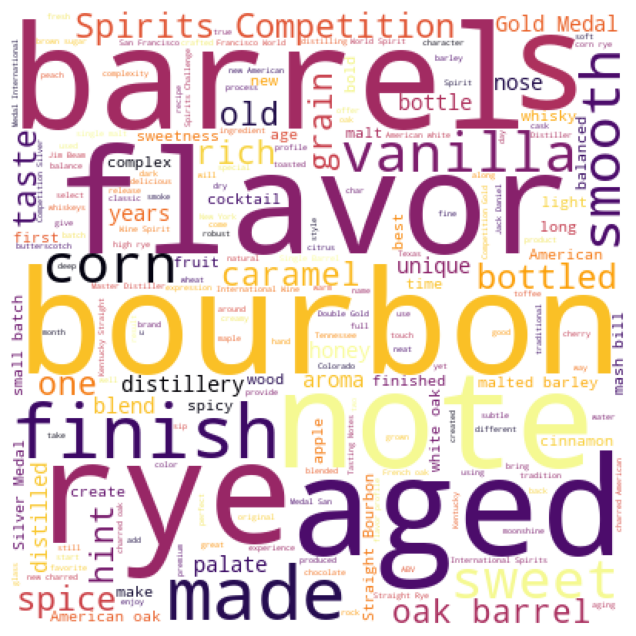

In [52]:
text=''
for row in bourbon.index:
    text=text+' '+str(bourbon.loc[row,'Description'])

STOPWORDS.add('whiskey')
STOPWORDS.add('nan')
STOPWORDS.add('proof')
STOPWORDS.add('year')

wordcloud=WordCloud(width=400,height=400,
             background_color='white',max_font_size=200,
             stopwords=STOPWORDS,
             repeat=True,
             colormap='inferno').generate(text)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [53]:
for row in bourbon.index:
    bourbon.loc[row,'ABV']=float(str(bourbon.loc[row,'ABV']).strip('%'))
    bourbon.loc[row,'Price']=float(str(bourbon.loc[row,'Price']).strip('$'))

c:\Users\KDP-30\anaconda3\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\KDP-30\anaconda3\Lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


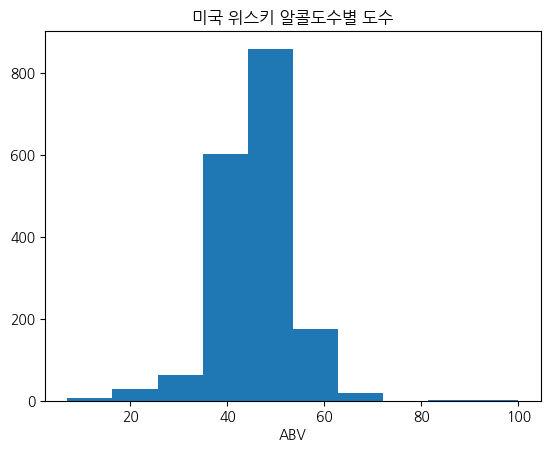

In [54]:
plt.hist(bourbon['ABV'])
plt.title('미국 위스키 알콜도수별 도수')
plt.xlabel('ABV')
plt.show()

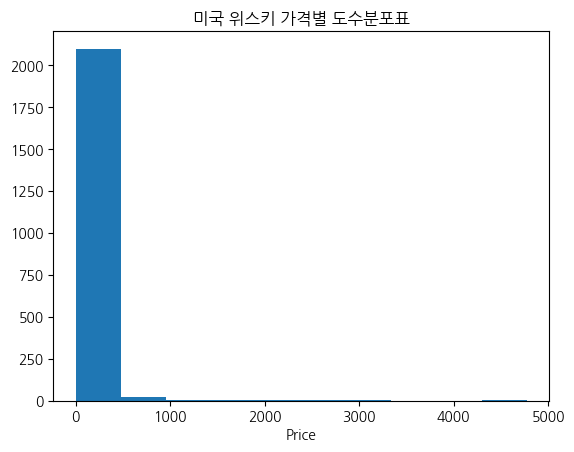

In [55]:
plt.hist(bourbon['Price'])
plt.title('미국 위스키 가격별 도수분포표')
plt.xlabel('Price')
plt.show()

In [56]:
bourbon['Price'].max()

4773.0

In [57]:
# 가장 비싼놈이 궁금해서...
for row in bourbon.index:
    if bourbon.loc[row,'Price']==bourbon['Price'].max():
        print(bourbon.loc[row,'Name'])

Jefferson’s Presidential Select 30 Year Old Bourbon


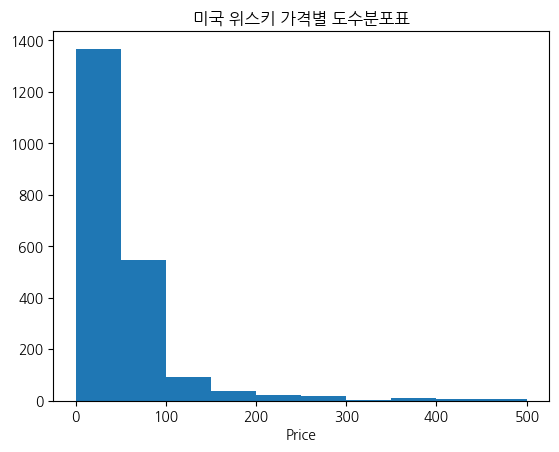

In [58]:
price=[]
for row in bourbon.index:
    if bourbon.loc[row,'Price']<=500:
        price.append(bourbon.loc[row,'Price'])
plt.hist(price)
plt.title('미국 위스키 가격별 도수분포표')
plt.xlabel('Price')
plt.show()

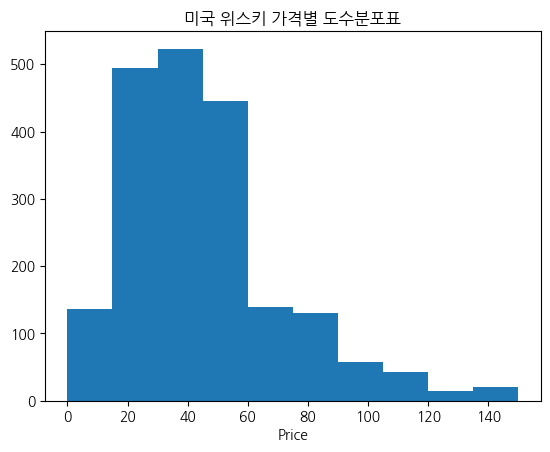

In [59]:
price=[]
for row in bourbon.index:
    if bourbon.loc[row,'Price']<=150:
        price.append(bourbon.loc[row,'Price'])
plt.hist(price)
plt.title('미국 위스키 가격별 도수분포표')
plt.xlabel('Price')
plt.show()

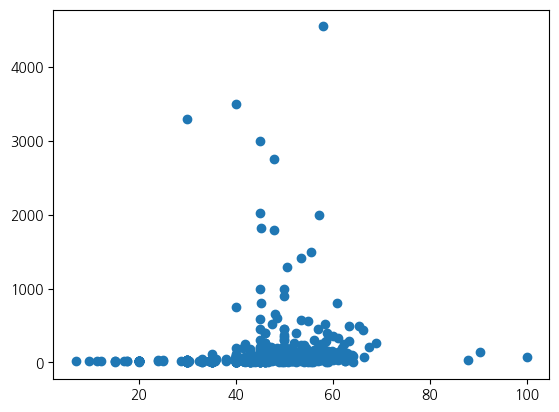

In [60]:
plt.scatter(bourbon['ABV'],bourbon['Price'])
plt.show()

c:\Users\KDP-30\anaconda3\Lib\site-packages\matplotlib\cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\KDP-30\anaconda3\Lib\site-packages\matplotlib\cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\KDP-30\anaconda3\Lib\site-packages\matplotlib\cbook.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Users\KDP-30\anaconda3\Lib\site-packages\matplotlib\cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


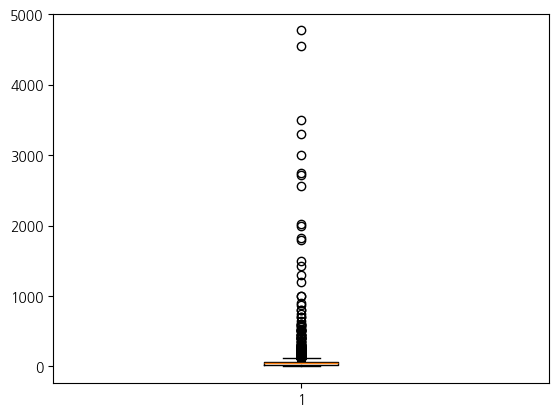

In [61]:
box=plt.boxplot(bourbon['Price'],whis=1.5)
plt.show()

In [62]:
for k,v in box.items():
    print(k)
    for _ in v:
        print(_.get_data())

whiskers
(array([1, 1]), array([27.52,  0.  ]))
(array([1, 1]), array([ 62.99, 114.99]))
caps
(array([0.9625, 1.0375]), array([0., 0.]))
(array([0.9625, 1.0375]), array([114.99, 114.99]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([27.52, 27.52, 62.99, 62.99, 27.52]))
medians
(array([0.925, 1.075]), array([42.99, 42.99]))
fliers
(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [63]:
price_ABV=bourbon[bourbon['Price']<=110]
price_ABV

,Name,Brand,Categories,ABV,Rating,Rate Count,Price,Description
0,Jack Daniel’s Old No. 7 Tennessee Whiskey,Jack Daniels,"Bourbon, Whiskey",40.0,4.8,991,24.0,Jack Daniel's Tennessee Whiskey is the world's...
1,Jack Daniel’s Tennessee Honey,Jack Daniels,"Flavored Whiskey, Whiskey",35.0,4.8,283,46.93,Jack Daniel’s Tennessee Honey is a blend of Ja...
2,Jack Daniel’s Gentleman Jack Tennessee Whiskey,Jack Daniels,"American Whiskey, Whiskey",40.0,4.9,131,32.99,Jack Daniel's Gentleman Jack is an exceptiona...
3,Jack Daniel’s Tennessee Fire Flavored Whiskey,Jack Daniels,"Flavored Whiskey, Whiskey",35.0,4.9,68,24.99,"Jack Daniel’s Tennessee Fire delivers a rich, ..."
4,Jack Daniel’s Tennessee Apple Flavored Whiskey,Jack Daniels,"Flavored Whiskey, Whiskey",35.0,5.0,44,24.99,"Highly versatile, deliciously smooth, and refr..."
...,...,...,...,...,...,...,...,...
4005,Gunnar’s Wheated Bourbon Whiskey,Gunnars,"Bourbon, Whiskey",45.0,5.0,1,29.99,"Featuring a select mash bill of 63% corn, 34% ..."
4006,George Remus Single Barrel Straight Bourbon Wh...,George Remus,"Bourbon, Whiskey",NaN,5.0,1,68.41,NaN
4007,Mashbuild Bourbon Batch 15,Mashbuild,"Bourbon, Whiskey",NaN,5.0,1,45.99,NaN
4008,Paddle Wheel Bourbon,Brain Brew,"Bourbon, Whiskey",45.0,5.0,1,0.0,TBD


C:\Users\KDP-30\AppData\Local\Temp\ipykernel_8480\1063175796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_ABV.dropna(subset=['ABV','Price'],inplace=True)


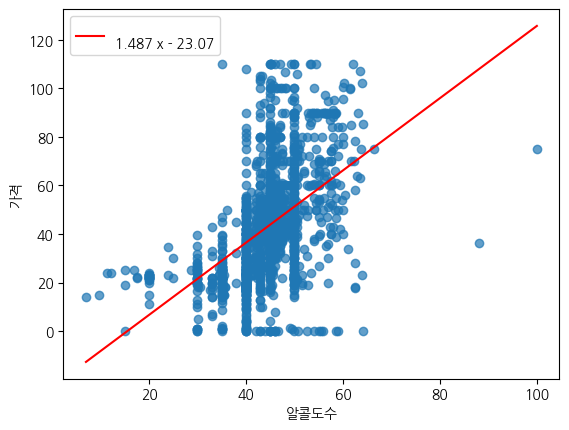

In [64]:
# 결측치 있는곳 삭제
price_ABV.dropna(subset=['ABV','Price'],inplace=True)
plt.scatter(price_ABV['ABV'],price_ABV['Price'],alpha=0.7)
plt.xlabel('알콜도수')
plt.ylabel('가격')

## 회귀직선
poly_fit=np.polyfit(list(price_ABV['ABV']),list(price_ABV['Price']),1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(price_ABV['ABV'].min(),price_ABV['ABV'].max())
ys=poly_1d(xs)
plt.plot(xs,ys,label=poly_1d,color='r')

plt.legend()
plt.show()



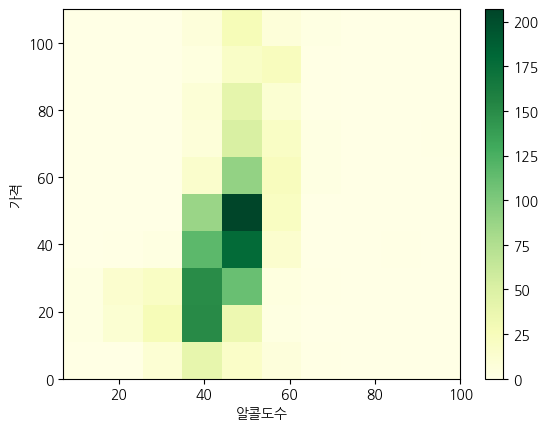

In [65]:
plt.hist2d(price_ABV['ABV'],price_ABV['Price'],cmap='YlGn')
plt.xlabel('알콜도수')
plt.ylabel('가격')
plt.colorbar()

In [66]:
# 가격과 알콜도수간의 상관계수
np.corrcoef(list(price_ABV['ABV']),list(price_ABV['Price']))

array([[1.        , 0.48315382],
       [0.48315382, 1.        ]])